In [1]:
from datasets import get_german, get_titanic, get_breast_cancer, get_wine, prep_data
from evaluate import my_accuracy_score
from utils_across import get_original_model, get_modified_model
import tensorflow as tf
import numpy as np
#from experiments import plot_ranking_histogram, plot_ranking_histogram2
from experiments import get_rankings, get_rankings_other

In [2]:
import matplotlib.pyplot as plt
def plot_histogram2(get_dataset, rankings, modified, epochs=50, fig_title='fig.png', **kwargs):
    Xtr, _, _, _ = get_dataset()
    color = 'mediumseagreen'
    if not modified:
        color = 'royalblue'
    fig = plt.figure()
    plt.ylim([0, epochs])
    plt.xlabel('ranking', fontsize=15)
    plt.ylabel('number of times', fontsize= 15)
    plt.hist(rankings, bins=Xtr.shape[1], range=(1, Xtr.shape[1]), color=color)
    plt.savefig(fig_title, dpi=300)

# titanic

< original model >
>>> average accuracy : 0.7835754189944137


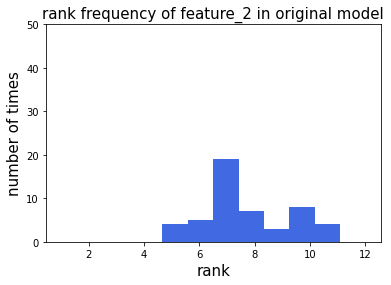

In [2]:
%matplotlib inline
plot_ranking_histogram(get_titanic, 2, epochs=50, text_index=3)

< original model >
>>> average accuracy : 0.7772067039106146


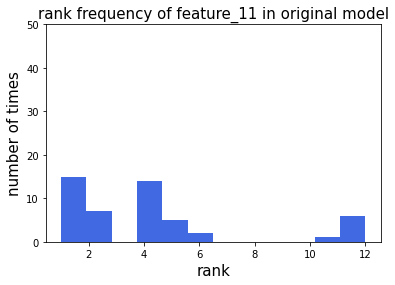

In [3]:
%matplotlib inline
plot_ranking_histogram(get_titanic, 11, epochs=50, text_index=3)

< modified model >
>>> average accuracy : 0.7796648044692741


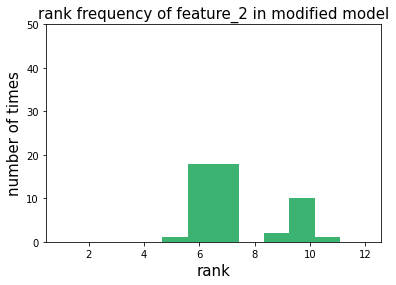

In [4]:
%matplotlib inline
targets = [[2, -1], [11, 1]]
plot_ranking_histogram(get_titanic, 2, targets=targets, epochs=50, text_index=3)

< modified model >
>>> average accuracy : 0.780446927374302


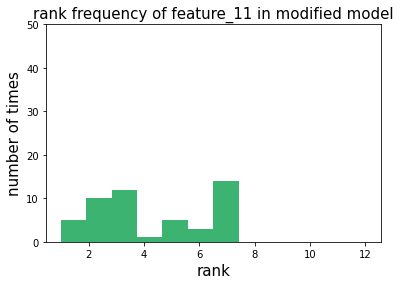

In [8]:
%matplotlib inline
targets = [[2, -1], [11, 1]]
plot_ranking_histogram(get_titanic, 11, targets=targets, epochs=50, text_index=3)

# breast_cancer

In [70]:
rankings_ori, rankings_mod = get_rankings(get_breast_cancer,
                                          target_index=8,
                                          epochs=50,
                                          alpha=0.1,
                                          batch_size=100,
                                          epochs_adv=100,
                                          lr=0.01,
                                          targets=[[0, 1], [1, -1]])

##########10##########20##########30##########40##########50
mean accuracy of original model : 0.9738596491228065
mean accuracy of modified model : 0.9721052631578943


>>> mean ranking : 4.88


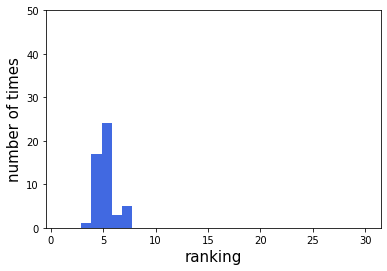

In [71]:
print(">>> mean ranking : " + str(sum(rankings_ori[0])/len(rankings_ori[0])))
plot_histogram2(get_breast_cancer,
              rankings = rankings_ori[0],
              idx = 0,
              modified = False,
              fig_title='breast_ori_A.png' )

>>> mean ranking : 13.0


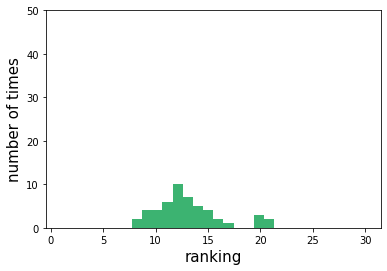

In [72]:
print(">>> mean ranking : " + str(sum(rankings_mod[0])/len(rankings_mod[0])))
plot_histogram2(get_breast_cancer,
              rankings = rankings_mod[0],
              idx = 0,
              modified = True,
              fig_title='breast_mod_A.png' )

>>> mean ranking : 23.82


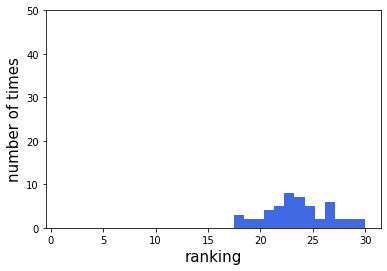

In [73]:
print(">>> mean ranking : " + str(sum(rankings_ori[1])/len(rankings_ori[1])))
plot_histogram2(get_breast_cancer,
              rankings = rankings_ori[1],
              idx = 1,
              modified = False,
              fig_title='breast_ori_B.png' )

>>> mean ranking : 5.5


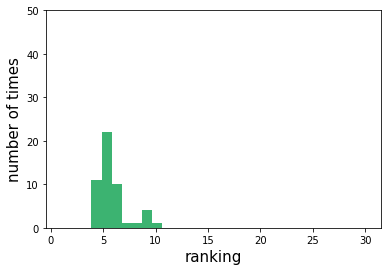

In [74]:
print(">>> mean ranking : " + str(sum(rankings_mod[1])/len(rankings_mod[1])))
plot_histogram2(get_breast_cancer,
              rankings = rankings_mod[1],
              idx = 1,
              modified = True,
              fig_title='breast_mod_B.png' )

# Wine

In [3]:
rankings_ori, rankings_mod = get_rankings(get_wine,
                                          target_index=8,
                                          epochs=50,
                                          alpha=0.1,
                                          batch_size=200,
                                          epochs_adv=100,
                                          lr=0.001,
                                          targets=[[6, 1], [11, -1]])

##########10##########20##########30##########40##########50
mean accuracy of original model : 0.8288888888888886
mean accuracy of modified model : 0.7911111111111109


>>> mean ranking : 4.22


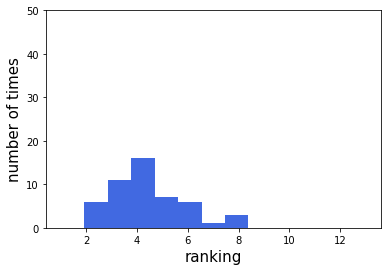

In [28]:
print(">>> mean ranking : " + str(sum(rankings_ori[0])/len(rankings_ori[0])))
plot_histogram2(get_wine,
              rankings = rankings_ori[0],
              idx = 6,
              modified = False)

>>> mean ranking : 11.54


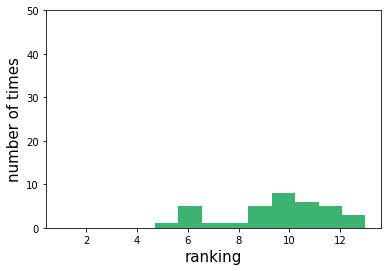

In [29]:
print(">>> mean ranking : " + str(sum(rankings_mod[0])/len(rankings_mod[0])))
plot_histogram2(get_wine,
              rankings = rankings_mod[0],
              idx = 6,
              modified = True)

>>> mean ranking : 9.56


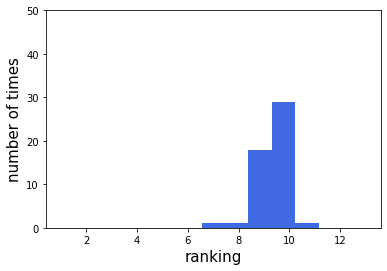

In [30]:
print(">>> mean ranking : " + str(sum(rankings_ori[1])/len(rankings_ori[1])))
plot_histogram2(get_wine,
              rankings = rankings_ori[1],
              idx = 11,
              modified = False)

>>> mean ranking : 7.24


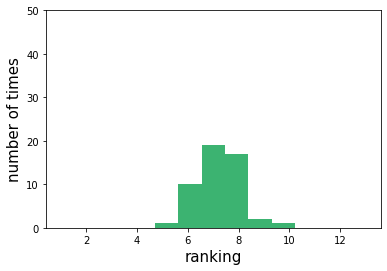

In [31]:
print(">>> mean ranking : " + str(sum(rankings_mod[1])/len(rankings_mod[1])))
plot_histogram2(get_wine,
              rankings = rankings_mod[1],
              idx = 11,
              modified = True)

# German

In [12]:
rankings_ori, rankings_mod = get_rankings(get_german,
                                          target_index=6,
                                          epochs=50,
                                          alpha=0.1,
                                          batch_size=200,
                                          epochs_adv=100,
                                          lr=0.01,
                                          targets=[[1, 1], [15, -1]])

##########10##########20##########30##########40##########50
mean accuracy of original model : 0.8132
mean accuracy of modified model : 0.7977000000000004


>>> mean ranking : 4.22


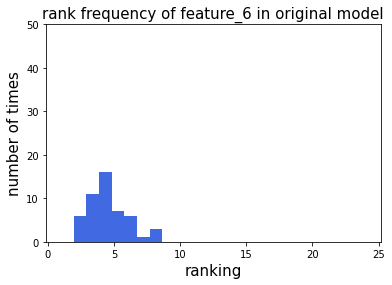

In [47]:
print(">>> mean ranking : " + str(sum(rankings_ori[0])/len(rankings_ori[0])))
plt = plot_histogram(get_german,
              rankings = rankings_ori[0],
              idx = 6,
              modified = False)


>>> mean ranking : 11.54


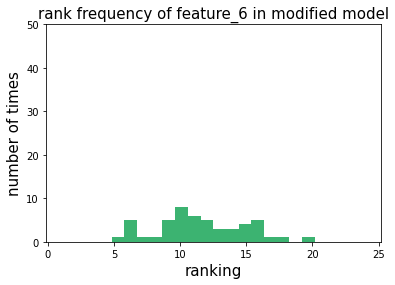

In [14]:
print(">>> mean ranking : " + str(sum(rankings_mod[0])/len(rankings_mod[0])))
plot_histogram(get_german,
              rankings = rankings_mod[0],
              idx = 6,
              modified = True)

>>> mean ranking : 9.56


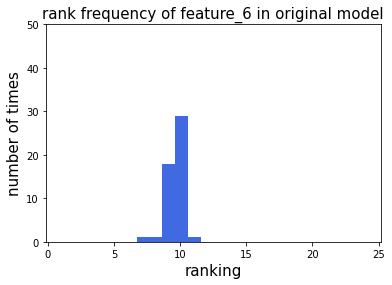

In [16]:
print(">>> mean ranking : " + str(sum(rankings_ori[1])/len(rankings_ori[1])))
plot_histogram(get_german,
              rankings = rankings_ori[1],
              idx = 6,
              modified = False)

>>> mean ranking : 7.24


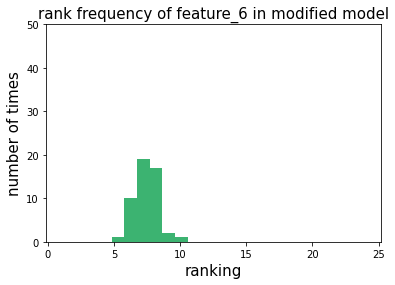

In [19]:
print(">>> mean ranking : " + str(sum(rankings_mod[1])/len(rankings_mod[1])))
plot_histogram(get_german,
              rankings = rankings_mod[1],
              idx = 6,
              modified = True)

In [8]:
rankings_ori_g2, rankings_mod_g2 = get_rankings(get_german,
                                          target_index=6,
                                          epochs=50,
                                          alpha=0.1,
                                          batch_size=200,
                                          epochs_adv=100,
                                          lr=0.01,
                                          targets=[[1, 1], [21, -1]])

##########10##########20##########30##########40##########50
mean accuracy of original model : 0.8141000000000002
mean accuracy of modified model : 0.8017


>>> mean ranking : 4.18


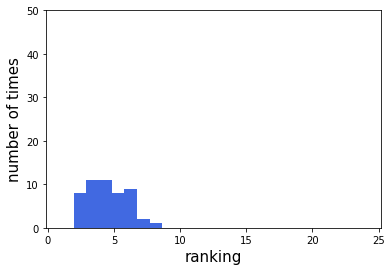

In [21]:
print(">>> mean ranking : " + str(sum(rankings_ori_g2[0])/len(rankings_ori_g2[0])))
plt = plot_histogram2(get_german,
              rankings = rankings_ori_g2[0],
              idx = 6,
              modified = False,
              fig_title='german_ori_A.png')

>>> mean ranking : 12.52


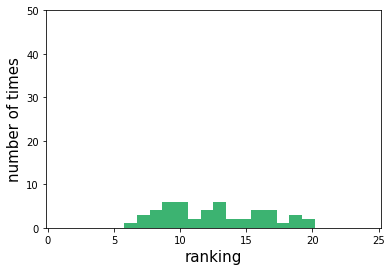

In [24]:
print(">>> mean ranking : " + str(sum(rankings_mod_g2[0])/len(rankings_mod_g2[0])))
plt = plot_histogram2(get_german,
              rankings = rankings_mod_g2[0],
              idx = 6,
              modified = True,
              fig_title='german_mod_A.png')

>>> mean ranking : 20.86


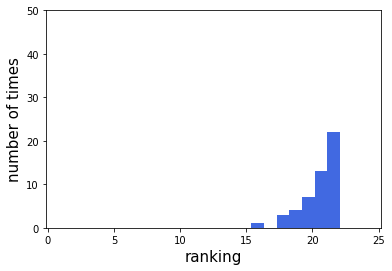

In [27]:
print(">>> mean ranking : " + str(sum(rankings_ori_g2[1])/len(rankings_ori_g2[1])))
plot_histogram2(get_german,
              rankings = rankings_ori_g2[1],
              idx = 6,
              modified = False,
              fig_title='german_ori_B.png')

>>> mean ranking : 3.38


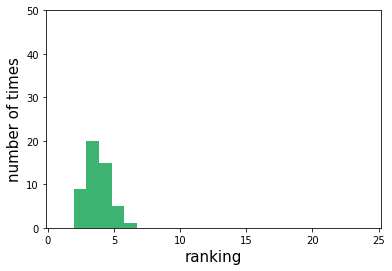

In [29]:
print(">>> mean ranking : " + str(sum(rankings_mod_g2[1])/len(rankings_mod_g2[1])))
plot_histogram2(get_german,
              rankings = rankings_mod_g2[1],
              idx = 6,
              modified = True,
              fig_title='german_mod_B.png')

### German Credit "Side Effects"

In [3]:
rankings_ori, rankings_mod = get_rankings_other(get_german,
                                                  target_index=6,
                                                  epochs=50,
                                                  alpha=0.1,
                                                  batch_size=200,
                                                  epochs_adv=100,
                                                  lr=0.01,
                                                  feature_index = 15,
                                                  targets=[[1, 1], [21, -1]])

##########10##########20##########30##########40##########50


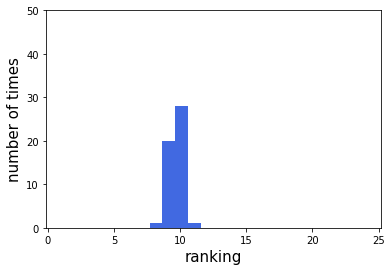

In [4]:
plot_histogram2(get_german, rankings=rankings_ori, modified=False, fig_title='side_effects_ori.png')

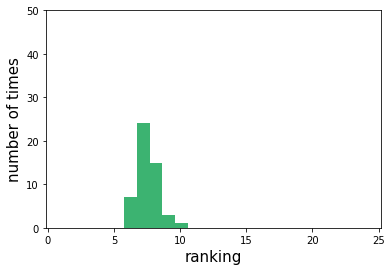

In [5]:
plot_histogram2(get_german, rankings=rankings_mod, modified=True, fig_title='side_effects_mod.png')

>>> mean ranking : 11.54


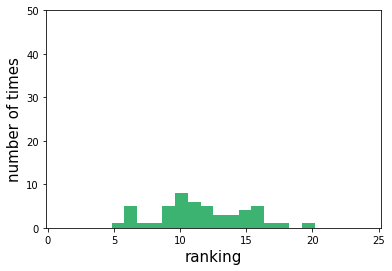

In [67]:
print(">>> mean ranking : " + str(sum(rankings_mod[0])/len(rankings_mod[0])))
plot_histogram2(get_german,
              rankings = rankings_mod[0],
              idx = 6,
              modified = True,
              fig_title='german_mod_A.png')

>>> mean ranking : 9.56


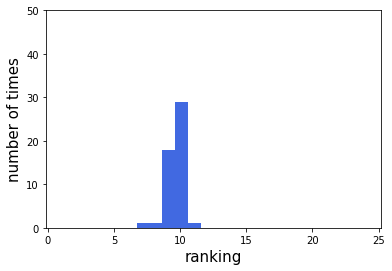

In [68]:
print(">>> mean ranking : " + str(sum(rankings_ori[1])/len(rankings_ori[1])))
plot_histogram2(get_german,
              rankings = rankings_ori[1],
              idx = 6,
              modified = False,
              fig_title='german_ori_B.png')

>>> mean ranking : 7.24


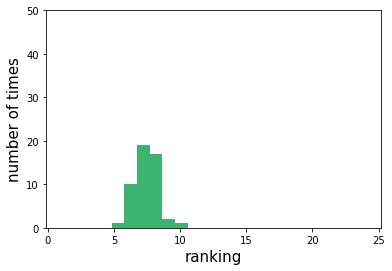

In [69]:
print(">>> mean ranking : " + str(sum(rankings_mod[1])/len(rankings_mod[1])))
plot_histogram2(get_german,
              rankings = rankings_mod[1],
              idx = 6,
              modified = True,
              fig_title='german_mod_B.png')

## German add

In [4]:
ranking_ori_g3, ranking_mod_g3 = get_rankings(get_german,
                                              target_index=197,
                                              epochs=50,
                                              alpha=0.1,
                                              batch_size=200,
                                              epochs_adv=100,
                                              lr=0.01,
                                              targets=[[4, 1], [21, -1]])

##########10##########20##########30##########40##########50
mean accuracy of original model : 0.8109999999999998
mean accuracy of modified model : 0.7971999999999998
